# Lab  #3

First and Last Name: Lam Nguyen

Student ID: 500838417

Video URL: -----------------------

# Unsupervised Learning 

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, accuracy_score

## Data preparation and EDA
In this assignment, two dataset will be used to investigate the unsupervised learning algorithms.

**Dataset 1:** eight data points specified as following 
* A1 = (2,10)
* A2 = (2,5)
* A3 = (8,4)
* A4 = (5,8)
* A5 = (7,5)
* A6 = (6,4)
* A7 = (1,2)
* A8 = (4,9)

**Dataset 2:**  A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa [(heart.csv)](https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv) with the following features and target:
1. sbp - systolic blood pressure
2. tobacco - cumulative tobacco (kg)
3. ldl - low densiity lipoprotein cholesterol
4. adiposity
5. famhist - family history of heart disease (Present, Absent)
6. typea - type-A behavior
7. obesity
8. alcohol - current alcohol consumption
9. age - age at onset
10. chd (target) - have coronary heart disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

In [2]:
# Implement dataset 1
data_points = {
    'X_coordinate': [2, 2, 8, 5, 7, 6, 1, 4],
    'Y_coordinate': [10, 5, 4, 8, 5, 4, 2, 9],
    'Points': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
}

df1 = pd.DataFrame(data_points)
df1

,X_coordinate,Y_coordinate,Points
0,2,10,A1
1,2,5,A2
2,8,4,A3
3,5,8,A4
4,7,5,A5
5,6,4,A6
6,1,2,A7
7,4,9,A8


In [3]:
# Load dataset 2
df2 = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
df2.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## Implementation Steps

### Standardization
Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance). This method is widely used for normalization in many machine learning algorithms as follows:

$$ x^{'} = \frac{x-\bar{x}}{\sigma} $$

In [4]:
def standardize(data):
  mean = data.mean()
  std_dev = data.std()
  standardized_data = (data - mean) / std_dev
  return standardized_data

### Calculate Euclidean distance
The Euclidean distance between a and b is denoted d(a, b). It is obtained directly from the distance matrix or calculated as follow:

$$ d(a,b) = \sqrt{(x_b - x_a)^2 + (y_b - y_a)^2} $$

In [5]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

### KMeans clustering
The k-means clustering algorithm is initialized with a value for k and a maximum number of iterations for finding the optimal centroid locations. If a maximum number of iterations is not considered when optimizing centroid locations, there is a risk of running an infinite loop.



In [6]:
class KMeansClustering:
  def __init__(self, n_clusters=8, max_iters=300, centroids=None, verbose=False):
    self.n_clusters = n_clusters
    self.max_iters = max_iters
    self.centroids = centroids
    self.verbose = verbose

  def initialize_random_centroids(self, X):
    np.random.seed(42)
    n_samples, n_features = np.shape(X)
    centroids = np.zeros((self.n_clusters, n_features))
    for n in range(self.n_clusters):
      centroid = X[np.random.choice(n_samples, 1, replace=False)]
      centroids[n] = centroid
    return centroids

  def closest_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample, centroid) for centroid in self.centroids]
    closest_idx = np.argmin(distances)
    return closest_idx

  def create_clusters(self, X, centroids):
    clusters = [[] for _ in range(self.n_clusters)]
    for sample_idx, sample in enumerate(X):
      centroid_idx = self.closest_centroid(sample, centroids)
      clusters[centroid_idx].append(sample_idx)
    return clusters

  def calculate_centroids(self, X, clusters, prev_centroids):
    n_features = np.shape(X)[1]
    centroids = np.zeros((self.n_clusters, n_features))
    for idx, cluster in enumerate(clusters):
      if len(cluster) > 0:
        centroid = np.mean(X[cluster], axis=0)
        centroids[idx] = centroid
      else:
        centroids[idx] = prev_centroids[idx]

    return centroids

  def get_cluster_labels(self, X, clusters):
    cluster_labels = np.zeros(np.shape(X)[0])
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        cluster_labels[sample_idx] = cluster_idx
    return cluster_labels

  def predict(self, X):
    n_samples = X.shape[0]
    clusters = np.zeros(n_samples)
    for i, sample in enumerate(X):
      distances = [euclidean_distance(sample, centroid) for centroid in self.centroids]
      closest_centroid = np.argmin(distances)
      clusters[i] = closest_centroid
    return clusters

  def fit(self, X):
    if self.centroids is not None:
      self.centroids = self.centroids
    else:
      self.centroids = self.initialize_random_centroids(X)
    for iter in range(self.max_iters):
      clusters = self.create_clusters(X, self.centroids)
      prev_centroids = self.centroids
      self.centroids = self.calculate_centroids(X, clusters, prev_centroids)
      diff = self.centroids - prev_centroids
      if self.verbose == True:
        print(f'Epochs {iter+1} ----> clusters: {clusters}, centroids: {self.centroids.round(2)}') 
      if not diff.any():
        break
    
    self.cluster_labels = self.get_cluster_labels(X, clusters)
    self.inertia = sum(((self.centroids[int(i)] - x)**2).sum() for x, i in zip(X, self.cluster_labels))

    return self

### Nearest Neighbors clustering 

In [7]:
class NNClustering:
  def __init__(self, threshold=4):
    self.threshold = threshold

  def fit(self, X):
    n_samples, n_features = np.shape(X)
    self.clusters = [[0]]
    self.cluster_labels = np.zeros(np.shape(X)[0])
    n_labels = 0
    for sample_idx in range(1, n_samples):
      distances = [euclidean_distance(X[sample_idx], X[j]) for j in range(sample_idx)]
      closest_distance = np.argmin(distances)
      if distances[closest_distance] < self.threshold:
        self.clusters[int(self.cluster_labels[closest_distance])].append(sample_idx)
        self.cluster_labels[sample_idx] = self.cluster_labels[closest_distance]
      else:
        self.clusters.append([sample_idx])
        n_labels += 1
        self.cluster_labels[sample_idx] = n_labels

    return self


### DBSCAN

## Data preprocessing




In [8]:
from sklearn import neighbors
class DBSCANClustering:
  def __init__(self, eps=0.5, min_samples=5):
    if eps <= 0:
      raise ValueError('Epsilon must be positive')
    if min_samples <= 1:
      raise ValueError('Minimum samples must be greater than 1')
    self.eps = eps
    self.min_samples = min_samples

  def get_neighbors(self, sample_i):
    neighbors = []
    idxs = np.arange(len(self.X))
    for i, sample in enumerate(self.X[idxs]):
      distance = euclidean_distance(self.X[sample_i], sample)
      if distance <= self.eps and distance > 0:
        neighbors.append(i)
    return np.array(neighbors)

  def cluster(self, sample_i, neighbors):
    cluster = [sample_i]
    # Iterate through neighbors
    for neighbor_i in neighbors:
      if not neighbor_i in self.visited_samples:
        self.visited_samples.append(neighbor_i)
        # Fetch the sample's distant neighbors (neighbors of neighbor)
        self.neighbors[neighbor_i] = self.get_neighbors(neighbor_i)
        # Make sure the neighbor's neighbors are more than min_samples
        # (If this is true the neighbor is a core point)
        if len(self.neighbors[neighbor_i]) >= self.min_samples - 1:
          # Expand the cluster from the neighbor
          expanded_cluster = self.cluster(
          neighbor_i, self.neighbors[neighbor_i])
          # Add expanded cluster to this cluster
          cluster = cluster + expanded_cluster
        else:
          # If the neighbor is not a core point we only add the neighbor point
          cluster.append(neighbor_i)
    return cluster

  def get_cluster_labels(self):
    labels = np.full(shape=self.X.shape[0], fill_value=-1)
    for cluster_i, cluster in enumerate(self.clusters):
      for sample_i in cluster:
        labels[sample_i] = cluster_i
    return labels

  def fit(self, X):
    self.X = X
    self.clusters = []
    self.visited_samples = []
    self.neighbors = {}
    n_samples = np.shape(self.X)[0]
    # Iterate through samples and expand clusters from them
    # if they have more neighbors than self.min_samples
    for sample_i in range(n_samples):
      if sample_i in self.visited_samples:
        continue
      self.neighbors[sample_i] = self.get_neighbors(sample_i)
      if len(self.neighbors[sample_i]) >= self.min_samples - 1:
        # If core point => mark as visited
        self.visited_samples.append(sample_i)
        # Sample has more neighbors than self.min_samples => expand cluster from sample
        new_cluster = self.cluster(
        sample_i, self.neighbors[sample_i])
        # Add cluster to list of clusters
        self.clusters.append(new_cluster)

    # Get the resulting cluster labels
    self.cluster_labels = self.get_cluster_labels()
        
    return self

  def predict(self, X_new):
    n_new_sample = X_new.shape[0]
    new_labels = np.full(shape=n_new_sample, fill_value=-1)
    for new_sample_i in range(n_new_sample):
      # Get neighbors for new sample 
      neighbors_i = self.get_neighbors(new_sample_i)

      if len(neighbors_i) < self.min_samples - 1:
        # If the point has less than min_samples neighbors, consider it as noise
        continue 
      # Assign the point to the same cluster as its neighbors
      neighbor_labels = self.cluster_labels[neighbors_i]
      unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
      most_common_label = unique_labels[np.argmax(counts)]
      new_labels[new_sample_i] = most_common_label

    return new_labels




### Dataset 1

In [9]:
# Extract values from two columns for clustering
X1 = df1[['X_coordinate', 'Y_coordinate']].values

### Dataset 2

In [10]:
# Extract values from two columns for clustering
X2 = df2[['sbp', 'tobacco']].values
y2 = df2[['chd']].values

# Standardize data
standardized_X2 = standardize(X2)
print(f'Mean: {standardized_X2.mean():.2f}')
print(f'Standar deviation: {standardized_X2.std():.2f}')

Mean: 0.00
Standar deviation: 1.00


In [11]:
# Split data into train and test set
X2_train, X2_test = standardized_X2[:300, :], standardized_X2[300:, :]
print(f'Train data shape: {X2_train.shape}')
print(f'Test data shape: {X2_test.shape}')

Train data shape: (300, 2)
Test data shape: (162, 2)


In [12]:
# Target values
y2_train, y2_test = y2[:300, :], y2[300:, :] 
print(f'Train target values shape: {y2_train.shape}')
print(f'Test target values shape: {y2_test.shape}')

Train target values shape: (300, 1)
Test target values shape: (162, 1)


## Part A - K-Means Clustering algorithm

### Perform K-Means clustering on dataset 1

In [13]:
# Initialize the centroids
centroids = np.array([[2, 10], [5, 8], [1, 2]])

In [14]:
# Initialize the model
kmeans_epoch1 = KMeansClustering(n_clusters=3, max_iters=1, centroids=centroids, verbose=True)
kmeans_epoch1.fit(X=X1);

Epochs 1 ----> clusters: [[0], [2, 3, 4, 5, 7], [1, 6]], centroids: [[ 2.  10. ]
 [ 6.   6. ]
 [ 1.5  3.5]]


In [15]:
# Model after 2 epochs
kmeans_epoch2 = KMeansClustering(n_clusters=3, max_iters=2, centroids=centroids, verbose=True)
kmeans_epoch2.fit(X=X1);

Epochs 1 ----> clusters: [[0], [2, 3, 4, 5, 7], [1, 6]], centroids: [[ 2.  10. ]
 [ 6.   6. ]
 [ 1.5  3.5]]
Epochs 2 ----> clusters: [[0, 7], [2, 3, 4, 5], [1, 6]], centroids: [[3.   9.5 ]
 [6.5  5.25]
 [1.5  3.5 ]]


In [16]:
# Convergent model 
kmeans_convergence = KMeansClustering(n_clusters=3, max_iters=100, centroids=centroids, verbose=True)
kmeans_convergence.fit(X=X1);

Epochs 1 ----> clusters: [[0], [2, 3, 4, 5, 7], [1, 6]], centroids: [[ 2.  10. ]
 [ 6.   6. ]
 [ 1.5  3.5]]
Epochs 2 ----> clusters: [[0, 7], [2, 3, 4, 5], [1, 6]], centroids: [[3.   9.5 ]
 [6.5  5.25]
 [1.5  3.5 ]]
Epochs 3 ----> clusters: [[0, 3, 7], [2, 4, 5], [1, 6]], centroids: [[3.67 9.  ]
 [7.   4.33]
 [1.5  3.5 ]]
Epochs 4 ----> clusters: [[0, 3, 7], [2, 4, 5], [1, 6]], centroids: [[3.67 9.  ]
 [7.   4.33]
 [1.5  3.5 ]]


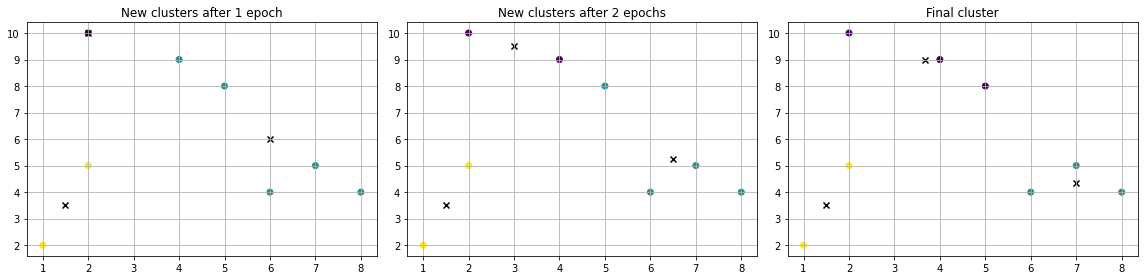

In [17]:
# View results 
plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
plt.scatter(X1[:,0], X1[:,1], c=kmeans_epoch1.cluster_labels)
plt.scatter([x for x, _ in kmeans_epoch1.centroids], [y for _, y in kmeans_epoch1.centroids], marker='x', c='black')
plt.title('New clusters after 1 epoch')
plt.grid()

plt.subplot(1, 3, 2)
plt.scatter(X1[:,0], X1[:,1], c=kmeans_epoch2.cluster_labels)
plt.scatter([x for x, _ in kmeans_epoch2.centroids], [y for _, y in kmeans_epoch2.centroids], marker='x', c='black')
plt.title('New clusters after 2 epochs')
plt.grid()

plt.subplot(1, 3, 3)
plt.scatter(X1[:,0], X1[:,1], c=kmeans_convergence.cluster_labels)
plt.scatter([x for x, _ in kmeans_convergence.centroids], [y for _, y in kmeans_convergence.centroids], marker='x', c='black')
plt.title('Final cluster')
plt.grid()

plt.tight_layout(h_pad=1.0)
plt.show();

### Verify results of dataset 1 with Scikit-Learn

In [18]:
# KMeans Scikit-Learn model
kmeans_sklearn_df1 = KMeans(n_clusters=3, max_iter=100).fit(X1)

kmeans_sklearn_df1.cluster_centers_.round(2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[7.  , 4.33],
       [3.67, 9.  ],
       [1.5 , 3.5 ]])

In [19]:
kmeans_sklearn_df1.labels_

array([1, 2, 0, 1, 0, 0, 2, 1], dtype=int32)

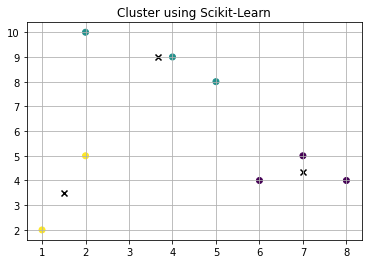

In [20]:
# View results
plt.scatter(X1[:,0], X1[:,1], c=kmeans_sklearn_df1.labels_)
plt.scatter([x for x, _ in kmeans_sklearn_df1.cluster_centers_], [y for _, y in kmeans_sklearn_df1.cluster_centers_], marker='x', c='black')
plt.title('Cluster using Scikit-Learn')
plt.grid()

### Perform K-Means clustering on dataset 2

#### Identify number of clusters using Elbow method 

In [21]:
# Determine the maximum number of clusters using the simple method
limit = int((X2_train.shape[0]//2)**0.5)

# Select optimal value of k using elbow method
 
# wcss - within cluster sum of squared distances
wcss = {}
 
for k in range(2,limit+1):
    model_elbow = KMeansClustering(n_clusters=k)
    model_elbow.fit(X2_train)
    wcss[k] = model_elbow.inertia

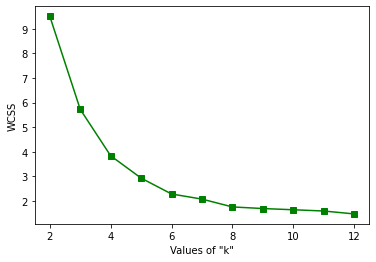

In [22]:
# Plot the wcss values to find out the elbow value
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

#### Identify number of clusters using Silhouette method 

In [23]:
# Determine the maximum number of clusters using the simple method
limit = int((X2_train.shape[0]//2)**0.5)

sil_score_kmeans = {}

# determining number of clusters using silhouette score method
for k in range(2, limit+1):
    model_silhouette_kmeans = KMeansClustering(n_clusters=k)
    model_silhouette_kmeans.fit(X2_train)
    sil_score_kmeans[k] = silhouette_score(X2_train, model_silhouette_kmeans.cluster_labels)

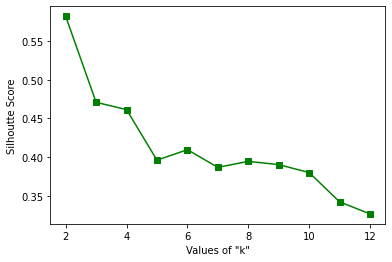

In [24]:
# Plot the sil_score values to find out the maximum score value
plt.plot(list(sil_score_kmeans.keys()), list(sil_score_kmeans.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('Silhoutte Score')
plt.show()

#### Train and test the data 

In [25]:
# Create the model 
kmeans_df2 = KMeansClustering(n_clusters=2, max_iters=300)

# Fit data 
kmeans_df2.fit(X2_train);

# Predict data
labels_df2_kmeans = kmeans_df2.predict(X2_test)

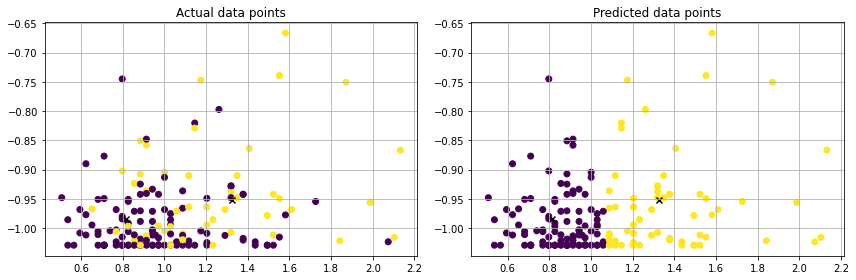

In [26]:
# Plot the actual data and predicted data
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(X2_test[:,0], X2_test[:,1], c=y2_test)
plt.scatter([x for x, _ in kmeans_df2.centroids], [y for _, y in kmeans_df2.centroids], marker='x', c='black')
plt.title('Actual data points')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X2_test[:,0], X2_test[:,1], c=labels_df2_kmeans)
plt.scatter([x for x, _ in kmeans_df2.centroids], [y for _, y in kmeans_df2.centroids], marker='x', c='black')
plt.title('Predicted data points')
plt.grid()

plt.tight_layout(h_pad=1.0)
plt.show();

In [27]:
# Provide accuracy
score_df2_train_kmeans = silhouette_score(X2_train, kmeans_df2.cluster_labels) 
score_df2_test_kmeans = silhouette_score(X2_test, labels_df2_kmeans)
accuracy_df2_kmeans = accuracy_score(y2_test.ravel(), labels_df2_kmeans)

print(f'Silhoutte training score: {score_df2_train_kmeans}')
print(f'Silhoutte test score: {score_df2_test_kmeans}')
print(f'Accuracy score: {accuracy_df2_kmeans}')

Silhoutte training score: 0.5822752138962888
Silhoutte test score: 0.555510339440153
Accuracy score: 0.6790123456790124


### Verify results of dataset 2 with Scikit-Learn

In [28]:
# KMeans Scikit-Learn model
kmeans_sklearn_df2 = KMeans(n_clusters=2, max_iter=300, init='random', random_state=0)

# Fit data 
kmeans_sklearn_df2.fit(X2_train);

# Predict data
labels_df2_kmeans_sklearn =  kmeans_sklearn_df2.predict(X2_test)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


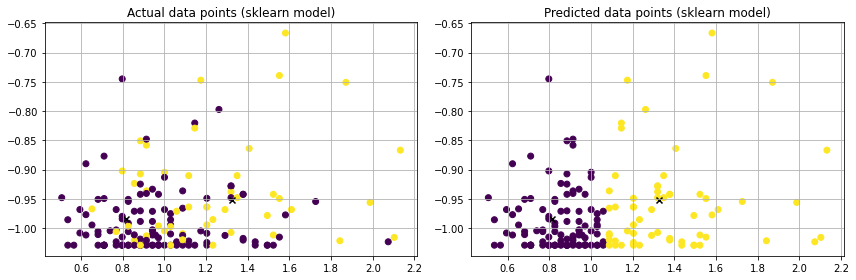

In [29]:
# Plot the actual data and predicted data
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(X2_test[:,0], X2_test[:,1], c=y2_test)
plt.scatter([x for x, _ in kmeans_sklearn_df2.cluster_centers_], [y for _, y in kmeans_sklearn_df2.cluster_centers_], marker='x', c='black')
plt.title('Actual data points (sklearn model)')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X2_test[:,0], X2_test[:,1], c=labels_df2_kmeans_sklearn)
plt.scatter([x for x, _ in kmeans_sklearn_df2.cluster_centers_], [y for _, y in kmeans_sklearn_df2.cluster_centers_], marker='x', c='black')
plt.title('Predicted data points (sklearn model)')
plt.grid()

plt.tight_layout(h_pad=1.0)
plt.show();

In [30]:
# Provide accuracy
score_df2_train_kmeans_sklearn = silhouette_score(X2_train, kmeans_sklearn_df2.labels_) 
score_df2_test_kmeans_sklearn = silhouette_score(X2_test, labels_df2_kmeans_sklearn)
accuracy_df2_kmeans_sklearn = accuracy_score(y2_test.ravel(), labels_df2_kmeans_sklearn)


print(f'Silhoutte training score: {score_df2_train_kmeans_sklearn}')
print(f'Silhoutte test score: {score_df2_test_kmeans_sklearn}')
print(f'Accuracy score: {accuracy_df2_kmeans_sklearn}')

Silhoutte training score: 0.5822752138962888
Silhoutte test score: 0.555510339440153
Accuracy score: 0.6790123456790124


## Part B - Nearest Neighbors algorithm 

### Perform Nearest Neighbors clustering on dataset 1

In [31]:
# Initialize the model
nbrs_df1 = NNClustering(threshold=4)
nbrs_df1.fit(X=X1);

In [32]:
nbrs_df1.clusters

[[0, 3, 7], [1, 6], [2, 4, 5]]

In [33]:
nbrs_df1.cluster_labels

array([0., 1., 2., 0., 2., 2., 1., 0.])

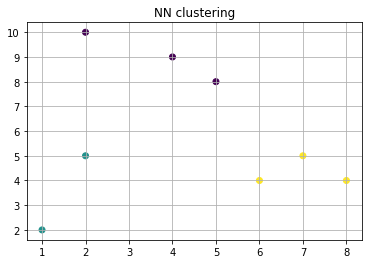

In [34]:
# View results
plt.scatter(X1[:,0], X1[:,1], c=nbrs_df1.cluster_labels)
plt.title('NN clustering')
plt.grid()
plt.show();


### Perform Nearest Neighbors clustering on dataset 2

In [87]:
threshold = np.arange(start=0.1, stop=0.3, step=0.01)

sil_score_nbrs_df = pd.DataFrame()

# determining number of clusters using silhouette score method
for t in threshold:
  model_silhouette_nbrs = NNClustering(threshold=t)
  cluster_labels_nbrs = model_silhouette_nbrs.fit(X2_train).cluster_labels
  if len(np.unique(cluster_labels_nbrs)) < 2:
    continue
  sil_score_nbrs = silhouette_score(X2_train, cluster_labels_nbrs)
  sil_score_nbrs_df = sil_score_nbrs_df.append(pd.DataFrame(data=[[f'threshold: {t:.2f}', sil_score_nbrs]], columns=['parameters', 'score']))
# Finding out the best hyperparameters with highest Score
sil_score_nbrs_df.sort_values(by='score', ascending=False).head()

,parameters,score
0,threshold: 0.28,0.462941
0,threshold: 0.27,0.460820
0,threshold: 0.26,0.460820
0,threshold: 0.25,0.460820
0,threshold: 0.29,0.418291


In [88]:
# Initialize the model
nbrs_df2 = NNClustering(threshold=0.28)
nbrs_df2.fit(X=X2_train);

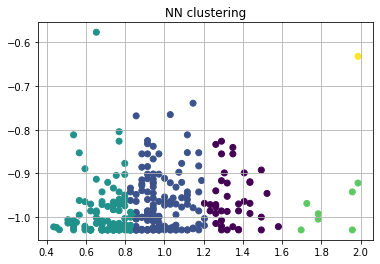

In [89]:
# View results
plt.scatter(X2_train[:,0], X2_train[:,1], c=nbrs_df2.cluster_labels)
plt.title('NN clustering')
plt.grid()
plt.show();

### Verify results of dataset 2 with Scikit-Learn

In [37]:
# KNeighborsClassifier Scikit-Learn model
nbrs_sklearn_df2 = KNeighborsClassifier(n_neighbors=2)
nbrs_sklearn_df2.fit(X2_train, y2_train.ravel());
labels_df2_nbrs_sklearn =  nbrs_sklearn_df2.predict(X2_test)

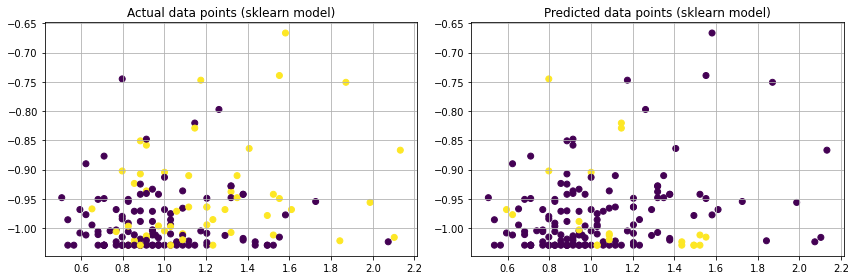

In [38]:
# Plot the actual data and predicted data
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(X2_test[:,0], X2_test[:,1], c=y2_test)
plt.title('Actual data points (sklearn model)')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X2_test[:,0], X2_test[:,1], c=labels_df2_nbrs_sklearn)
plt.title('Predicted data points (sklearn model)')
plt.grid()

plt.tight_layout(h_pad=1.0)
plt.show();

In [39]:
# Provide accuracy
accuracy_df2_nbrs_sklearn = accuracy_score(y2_test.ravel(), labels_df2_nbrs_sklearn)

print(f'Accuracy score: {accuracy_df2_nbrs_sklearn}')

Accuracy score: 0.6481481481481481


## Part C - DBSCAN algorithm

### Perform DBSCAN clustering on dataset 1

In [40]:
# Initialize the model
dbsc_df1_1 = DBSCANClustering(eps=2, min_samples=2).fit(X1);

dbsc_df1_2 = DBSCANClustering(eps=10**0.5, min_samples=2).fit(X1);

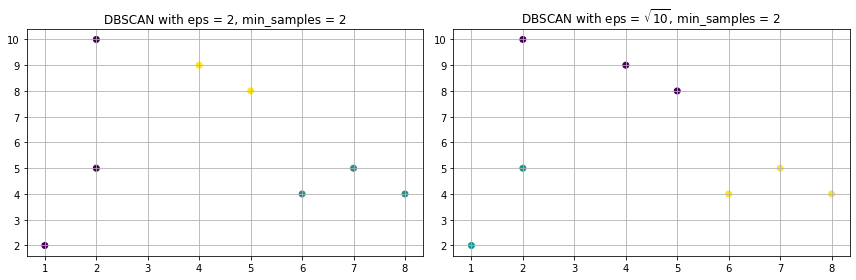

In [41]:
# View results
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(X1[:,0], X1[:,1], c=dbsc_df1_1.cluster_labels)
plt.title('DBSCAN with eps = 2, min_samples = 2')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X1[:,0], X1[:,1], c=dbsc_df1_2.cluster_labels)
plt.title('DBSCAN with eps = $\sqrt{10}$, min_samples = 2')
plt.grid()

plt.tight_layout(h_pad=1.0)
plt.show();

### Verify results of dataset 1 with Scikit-Learn

In [42]:
# DBSCAN Scikit-Learn model
dbsc_sklearn_df1_1 = DBSCAN(eps=2, min_samples=2).fit(X1)
dbsc_sklearn_df1_2 = DBSCAN(eps=10**0.5, min_samples=2).fit(X1)

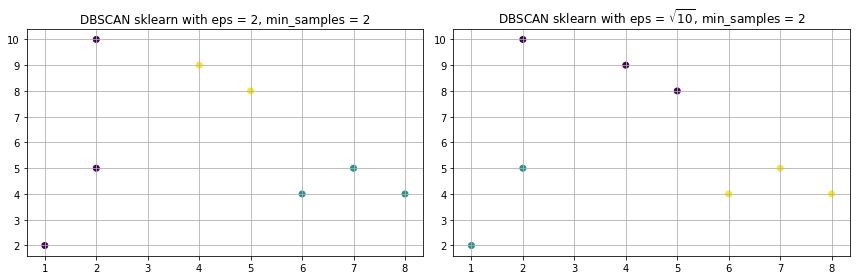

In [43]:
# Plot the actual data and predicted data
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(X1[:,0], X1[:,1], c=dbsc_sklearn_df1_1.labels_)
plt.title('DBSCAN sklearn with eps = 2, min_samples = 2')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X1[:,0], X1[:,1], c=dbsc_sklearn_df1_2.labels_)
plt.title('DBSCAN sklearn with eps = $\sqrt{10}$, min_samples = 2')
plt.grid()

plt.tight_layout(h_pad=1.0)
plt.show();

### Perform DBSCAN clustering on dataset 2

#### Identify eps and min_sample for DBSCAN

In [76]:
epsilon = np.arange(start=0.1, stop=0.3, step=0.01)
num_samples = np.arange(start=2, stop=10, step=1)

sil_score_dbsc = pd.DataFrame()

# determining number of clusters using silhouette score method
for e in epsilon:
  for s in num_samples:
    model_silhouette_dbsc = DBSCAN(eps=e, min_samples=s)
    cluster_labels = model_silhouette_dbsc.fit_predict(X2_train)
    if len(np.unique(cluster_labels)) < 3 or len(np.unique(cluster_labels)) > 3:
      continue
    sil_score = silhouette_score(X2_train, cluster_labels)
    sil_score_dbsc = sil_score_dbsc.append(pd.DataFrame(data=[[f'eps: {e:.2f}, min_samples: {s}', sil_score]], columns=['parameters', 'score']))
 
# Finding out the best hyperparameters with highest Score
sil_score_dbsc.sort_values(by='score', ascending=False).head()

,parameters,score
0,"eps: 0.19, min_samples: 6",0.620066
0,"eps: 0.12, min_samples: 2",0.603713
0,"eps: 0.12, min_samples: 3",0.603713
0,"eps: 0.13, min_samples: 2",0.603713
0,"eps: 0.13, min_samples: 3",0.603713


#### Train and test the data 

In [90]:
# Create the model 
dbsc_df2 = DBSCANClustering(eps=0.19, min_samples=6)

# Fit data 
dbsc_df2.fit(X2_train);

# Predict data
labels_df2_dbsc = dbsc_df2.predict(X2_test)

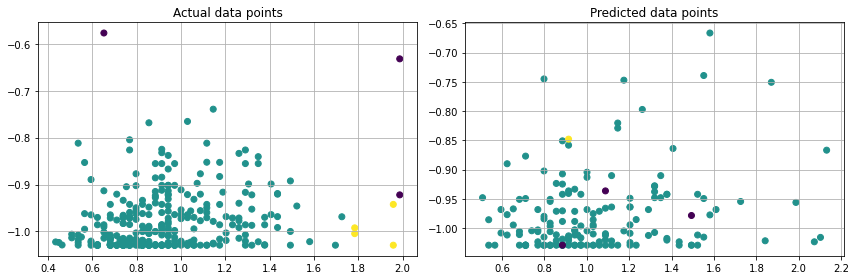

In [91]:
# Plot the actual data and predicted data
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(X2_train[:,0], X2_train[:,1], c=dbsc_df2.cluster_labels)
plt.title('Actual data points')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X2_test[:,0], X2_test[:,1], c=labels_df2_dbsc)
plt.title('Predicted data points')
plt.grid()

plt.tight_layout(h_pad=1.0)
plt.show();

### Verify results of dataset 2 with Scikit-Learn

In [92]:
# Create the model 
dbsc_sklearn_df2 = DBSCAN(eps=0.19, min_samples=6)

# Fit data 
train_labels = dbsc_sklearn_df2.fit_predict(X2_train);

# Predict data
test_labels = dbsc_sklearn_df2.fit_predict(X2_test);

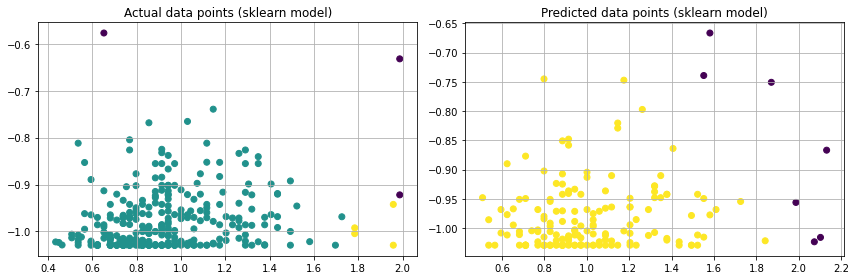

In [93]:
# Plot the actual data and predicted data
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(X2_train[:,0], X2_train[:,1], c=train_labels)
plt.title('Actual data points (sklearn model)')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X2_test[:,0], X2_test[:,1], c=test_labels)
plt.title('Predicted data points (sklearn model)')
plt.grid()

plt.tight_layout(h_pad=1.0)
plt.show();